In [74]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
# 读取数据

In [75]:
dataset = pd.read_csv('fire_counts.csv')
dataset.dropna(inplace=True)
dataset.head()

,year,counts,Fatalities,Injuries
0,1966,30436,164,978
1,1967,32956,127,966
2,1968,32922,154,1026
3,1969,43733,167,1106
4,1970,51835,142,1168


In [76]:
datanew=dataset.iloc[:,1:]

In [77]:
datanew.head()

,counts,Fatalities,Injuries
0,30436,164,978
1,32956,127,966
2,32922,154,1026
3,43733,167,1106
4,51835,142,1168


In [78]:
datanew.shape

(55, 3)

In [79]:
my_imputer = SimpleImputer()
datanew1 = my_imputer.fit_transform(datanew)
#datanew1=np.transpose(datanew)

In [80]:
datanew1

array([[3.0436e+04, 1.6400e+02, 9.7800e+02],
       [3.2956e+04, 1.2700e+02, 9.6600e+02],
       [3.2922e+04, 1.5400e+02, 1.0260e+03],
       [4.3733e+04, 1.6700e+02, 1.1060e+03],
       [5.1835e+04, 1.4200e+02, 1.1680e+03],
       [4.2593e+04, 1.5000e+02, 9.3300e+02],
       [4.8159e+04, 1.3800e+02, 1.0830e+03],
       [4.9142e+04, 1.3900e+02, 1.0720e+03],
       [4.6047e+04, 1.7900e+02, 1.1210e+03],
       [5.1539e+04, 1.7700e+02, 8.4200e+02],
       [6.3524e+04, 1.3500e+02, 9.8600e+02],
       [4.4221e+04, 1.3100e+02, 1.0390e+03],
       [4.4136e+04, 1.2900e+02, 1.0910e+03],
       [5.2331e+04, 1.5100e+02, 1.2460e+03],
       [4.6645e+04, 1.9600e+02, 9.5800e+02],
       [4.4331e+04, 1.8500e+02, 1.0870e+03],
       [4.5215e+04, 1.6700e+02, 1.0890e+03],
       [5.0549e+04, 1.6400e+02, 1.3330e+03],
       [5.1076e+04, 1.2500e+02, 1.2100e+03],
       [5.0326e+04, 1.5400e+02, 1.5210e+03],
       [4.6070e+04, 1.2400e+02, 1.5570e+03],
       [4.3268e+04, 1.9300e+02, 1.4820e+03],
       [4.

In [81]:
#datanew1
# 建立模型
model = AgglomerativeClustering(n_clusters=4)
model.fit(datanew1)
datanew['类别标签'] = model.labels_
print(datanew.head())

   counts  Fatalities  Injuries  类别标签
0   30436         164       978     1
1   32956         127       966     1
2   32922         154      1026     1
3   43733         167      1106     0
4   51835         142      1168     0


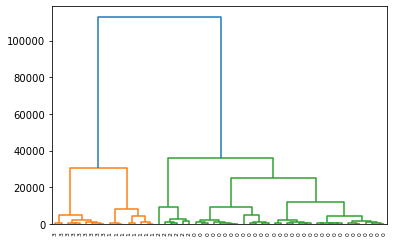

In [82]:
# 画图
ss = sch.linkage(datanew1,method='ward')
#sch.dendrogram(ss)
sch.dendrogram(ss,labels=model.labels_)
plt.show()

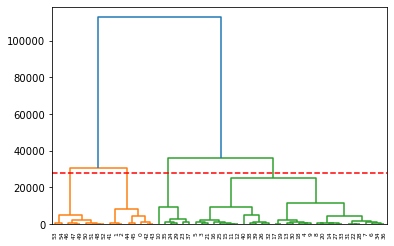

In [83]:
ss = sch.linkage(datanew1,method='ward')
sch.dendrogram(ss)
plt.axhline(y=28000, color='r', linestyle='--')

In [64]:
h_index = model.labels_#行标签
user_index = list(datanew.index.values)#行标签
for i in range(h_index.shape[0]):
    print(user_index[i],end='\t')
    print(h_index[i])

0	1
1	1
2	1
3	0
4	0
5	0
6	0
7	0
8	0
9	0
10	2
11	0
12	0
13	0
14	0
15	0
16	0
17	0
18	0
19	0
20	0
21	0
22	0
23	2
24	2
25	0
26	0
27	0
28	0
29	2
30	0
31	0
32	0
33	0
34	0
35	2
36	0
37	2
38	0
39	0
40	0
41	1
42	1
43	1
44	1
45	1
46	3
47	3
48	3
49	3
50	3
51	3
52	3
53	3
54	3


In [49]:
dataset = pd.read_csv('fire_counts.csv')
dataset.dropna(inplace=True)
dataset.head()

,year,counts,Fatalities,Injuries
0,1966,30436,164,978
1,1967,32956,127,966
2,1968,32922,154,1026
3,1969,43733,167,1106
4,1970,51835,142,1168


In [50]:
dataset.shape

(55, 4)

In [33]:
datanew=dataset.iloc[:,:]
datanew=np.transpose(datanew)
datanew.shape

(4, 55)

In [39]:
datanew

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
year,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
counts,30436,32956,32922,43733,51835,42593,48159,49142,46047,51539,...,26847,21443,21158,19622,20923,20391,19863,19675,17993,17411
Fatalities,164,127,154,167,142,150,138,139,179,177,...,55,42,49,29,33,46,102,45,36,30
Injuries,978,966,1026,1106,1168,933,1083,1072,1121,842,...,1227,1153,1054,972,984,889,1036,858,791,694


In [51]:
my_imputer = SimpleImputer()
datanew1 = my_imputer.fit_transform(dataset)
#datanew1=np.transpose(datanew)

In [52]:
datanew1

array([[1.9660e+03, 3.0436e+04, 1.6400e+02, 9.7800e+02],
       [1.9670e+03, 3.2956e+04, 1.2700e+02, 9.6600e+02],
       [1.9680e+03, 3.2922e+04, 1.5400e+02, 1.0260e+03],
       [1.9690e+03, 4.3733e+04, 1.6700e+02, 1.1060e+03],
       [1.9700e+03, 5.1835e+04, 1.4200e+02, 1.1680e+03],
       [1.9710e+03, 4.2593e+04, 1.5000e+02, 9.3300e+02],
       [1.9720e+03, 4.8159e+04, 1.3800e+02, 1.0830e+03],
       [1.9730e+03, 4.9142e+04, 1.3900e+02, 1.0720e+03],
       [1.9740e+03, 4.6047e+04, 1.7900e+02, 1.1210e+03],
       [1.9750e+03, 5.1539e+04, 1.7700e+02, 8.4200e+02],
       [1.9760e+03, 6.3524e+04, 1.3500e+02, 9.8600e+02],
       [1.9770e+03, 4.4221e+04, 1.3100e+02, 1.0390e+03],
       [1.9780e+03, 4.4136e+04, 1.2900e+02, 1.0910e+03],
       [1.9790e+03, 5.2331e+04, 1.5100e+02, 1.2460e+03],
       [1.9800e+03, 4.6645e+04, 1.9600e+02, 9.5800e+02],
       [1.9810e+03, 4.4331e+04, 1.8500e+02, 1.0870e+03],
       [1.9820e+03, 4.5215e+04, 1.6700e+02, 1.0890e+03],
       [1.9830e+03, 5.0549e+04,

In [53]:
#datanew1
# 建立模型
model = AgglomerativeClustering(n_clusters=4)
model.fit(datanew1)
dataset['类别标签'] = model.labels_
print(dataset.head())

   year  counts  Fatalities  Injuries  类别标签
0  1966   30436         164       978     1
1  1967   32956         127       966     1
2  1968   32922         154      1026     1
3  1969   43733         167      1106     0
4  1970   51835         142      1168     0


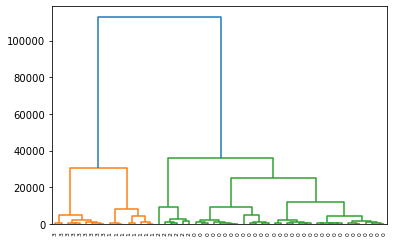

In [54]:
# 画图
ss = sch.linkage(datanew1,method='ward')
#sch.dendrogram(ss)
sch.dendrogram(ss,labels=model.labels_)
plt.show()

In [55]:
h_index = model.labels_#行标签
user_index = list(dataset.index.values)#行标签
for i in range(h_index.shape[0]):
    print(user_index[i],end='\t')
    print(h_index[i])

0	1
1	1
2	1
3	0
4	0
5	0
6	0
7	0
8	0
9	0
10	2
11	0
12	0
13	0
14	0
15	0
16	0
17	0
18	0
19	0
20	0
21	0
22	0
23	2
24	2
25	0
26	0
27	0
28	0
29	2
30	0
31	0
32	0
33	0
34	0
35	2
36	0
37	2
38	0
39	0
40	0
41	1
42	1
43	1
44	1
45	1
46	3
47	3
48	3
49	3
50	3
51	3
52	3
53	3
54	3


In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(datanew1)
plt.figure()
a=[]
for i in range(1,40):
    pca=PCA(n_components=i).fit(datanew1)
    explained_variance=pca.explained_variance_ratio_
    a.append(explained_variance.sum())
plt.plot(a)
plt.xlabel("Number of Components")
plt.ylabel("Variance(%)")
plt.title("Pulsar Dataset Explained Variance")
plt.show()

ValueError: n_components=5 must be between 0 and min(n_samples, n_features)=4 with svd_solver='full'

<Figure size 432x288 with 0 Axes>

In [ ]:
#datanew1
# 建立模型
model = AgglomerativeClustering(n_clusters=4)
model.fit(df)
ps['类别标签'] = model.labels_
print(ps.head())

In [25]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
# 读取数据
data = pd.read_csv('fire_counts.csv')
data = data.iloc[:,:]
data=np.transpose(data)
print(data.head())
df = MinMaxScaler().fit_transform(data)

               0      1      2      3      4      5      6      7      8   \
year         1966   1967   1968   1969   1970   1971   1972   1973   1974   
counts      30436  32956  32922  43733  51835  42593  48159  49142  46047   
Fatalities    164    127    154    167    142    150    138    139    179   
Injuries      978    966   1026   1106   1168    933   1083   1072   1121   

               9   ...     45     46     47     48     49     50     51  \
year         1975  ...   2011   2012   2013   2014   2015   2016   2017   
counts      51539  ...  26847  21443  21158  19622  20923  20391  19863   
Fatalities    177  ...     55     42     49     29     33     46    102   
Injuries      842  ...   1227   1153   1054    972    984    889   1036   

               52     53     54  
year         2018   2019   2020  
counts      19675  17993  17411  
Fatalities     45     36     30  
Injuries      858    791    694  

[4 rows x 55 columns]


In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(datanew1)
plt.figure()
a=[]
for i in range(1,40):
    pca=PCA(n_components=i).fit(datanew1)
    explained_variance=pca.explained_variance_ratio_
    a.append(explained_variance.sum())
plt.plot(a)
plt.xlabel("Number of Components")
plt.ylabel("Variance(%)")
plt.title("Pulsar Dataset Explained Variance")
plt.show()

ValueError: n_components=5 must be between 0 and min(n_samples, n_features)=4 with svd_solver='full'

<Figure size 432x288 with 0 Axes>